In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [2]:
import matplotlib.pyplot as plt

#한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

#그래프가 노트북안에 보이게 하기 위해
%matplotlib inline

### Q1.

In [3]:
df[df["상권업종소분류명"]=="약국"]["시도명"].value_counts()

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

### Q2.

In [4]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

animal = df[df["상권업종소분류명"]=="동물병원"]
animal_count = animal["시도명"].value_counts()
animal_count

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64

<Axes: ylabel='시도명'>

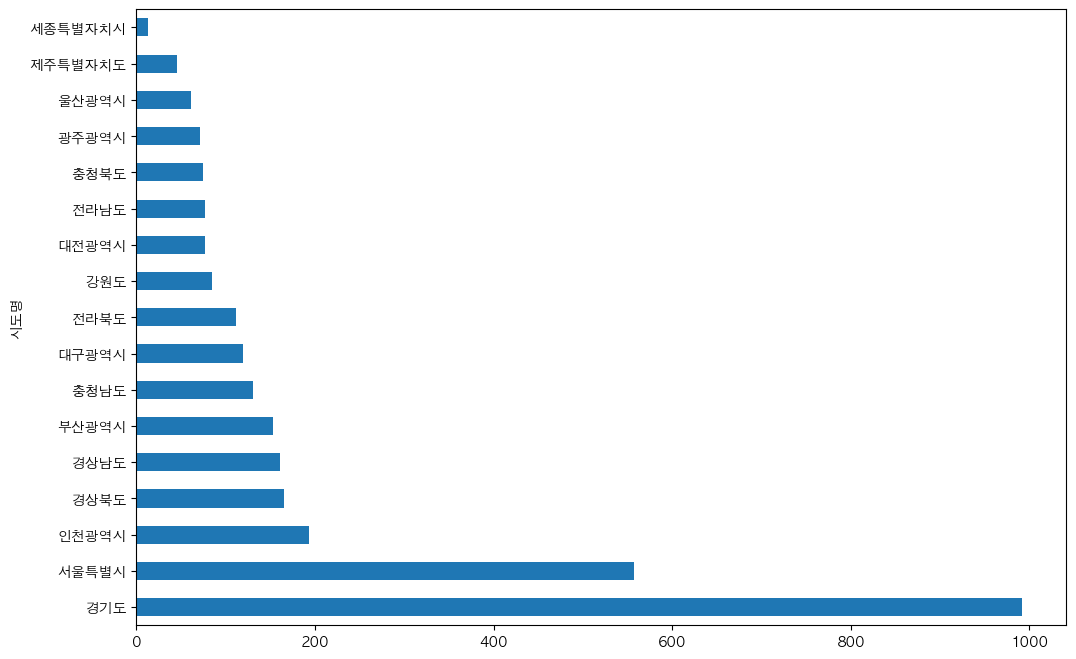

In [6]:
animal_count.plot.barh(figsize=(12,8))

### Q3.

In [7]:
seoul_hospitals = df[df["시도명"] == "서울특별시"]
seoul_hospitals.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742


In [14]:
#서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
skin_or_plastic_hospitals = seoul_hospitals[seoul_hospitals["상권업종소분류명"].str.contains("피부|성형")]
skin_or_plastic_hospitals.shape

(1373, 39)

In [15]:
total_hospitals = seoul_hospitals["시군구명"].value_counts()
skin_or_plastic_count = skin_or_plastic_hospitals["시군구명"].value_counts()
ratio = (skin_or_plastic_count / total_hospitals).round(2)

In [16]:
#비율이 높은 순서대로 정렬되게 구해주세요!
ratio_sorted = ratio.sort_values(ascending=False)
ratio_sorted

시군구명
강남구     0.19
서초구     0.13
마포구     0.06
강서구     0.05
서대문구    0.05
중구      0.05
영등포구    0.05
양천구     0.05
송파구     0.05
강동구     0.05
은평구     0.04
성북구     0.04
성동구     0.04
중랑구     0.04
노원구     0.04
구로구     0.04
광진구     0.04
관악구     0.03
동작구     0.03
금천구     0.03
용산구     0.03
강북구     0.03
동대문구    0.02
종로구     0.02
도봉구     0.01
Name: count, dtype: float64

### Q4.

In [11]:
import folium

In [13]:
df_silver_hospitals = df[df["상권업종소분류명"].str.contains("노인|치매")]

map = folium.Map(location=[36.5, 127.5], zoom_start=7)

for n in df_silver_hospitals.index:
    name = df_silver_hospitals.loc[n, "상호명"]
    address = df_silver_hospitals.loc[n, "도로명주소"]
    popup = f"{name} - {address}"
    location = [df_silver_hospitals.loc[n, "위도"], df_silver_hospitals.loc[n, "경도"]]
    
    folium.Marker(
        location=location,
        popup=popup,
    ).add_to(map)

map